## Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [3]:
# mesuring the difference bwt original mesured data and data generated by a population of chromosomes
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time **3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1 / error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

# Based on the fitness function the best chromosomes are becoming parents
def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]

# building the new generation of chromosomes from parents. 50% from each parents chosen by priority
def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

# On all chromosome of the new generation, we are changing a random gene by a random percentage
# def mutation(offspring_recombination):
def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0, offspring_recombination.shape[1], 1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] * random_value / 100
    return offspring_recombination

### GA application for fitting time series data

In [4]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []
pop_analytic = [4.8, 12.1, 53.2 , 6219]

In [5]:
new_population = np.random.randint(low=0, high=10000, size=population_size)
print(np.sum(fitness_function(data, new_population)))

4.9724736677480895e-11


The population of the first generation: 
[[2175 2343  116 7446]
 [6153 8850 1989 6581]
 [3555 3736 2269 7034]
 ...
 [  57 8233 7911 5409]
 [ 184 4392 1856 2202]
 [6401 5285 1392 8785]]

Evolution:
Generation =  0 	Best fitness =  119105573114.91663
Generation =  1 	Best fitness =  80645250441.20215
Generation =  2 	Best fitness =  19622633275.89834
Generation =  3 	Best fitness =  1221141634.65262
Generation =  4 	Best fitness =  1221141634.65262
Generation =  5 	Best fitness =  1204693519.97245
Generation =  6 	Best fitness =  1204693519.97245
Generation =  7 	Best fitness =  188867257.58675
Generation =  8 	Best fitness =  108788516.96137
Generation =  9 	Best fitness =  69276577.18594
Generation =  10 	Best fitness =  69276577.18594
Generation =  11 	Best fitness =  25121300.04673
Generation =  12 	Best fitness =  22379695.13326
Generation =  13 	Best fitness =  18420596.97266
Generation =  14 	Best fitness =  18420596.97266
Generation =  15 	Best fitness =  17860675.80754
Generatio

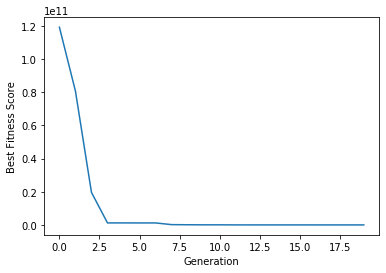

In [6]:
# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):
    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1 / np.max(fitness), 5))
    best_outputs.append(round(1 / np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

Generate once the analytic curve

In [7]:
y_hat_analytic = []
error = 0
for event in range(len(data)):
    event_time = data[event][0]
    event_measured = data[event][1]
    event_analytic = pop_analytic[0] * event_time ** 3 + pop_analytic[1] * event_time ** 2 + pop_analytic[2] * event_time + pop_analytic[3]
    y_hat_analytic.append(event_analytic)
    error += (event_analytic - event_measured) ** 2
y_pred_analytic = np.array(y_hat_analytic)
fitness_analytic = 1 / error


By displaying the Analytic solution, GA, and the orginal data, this function will help to compare the fitting

In [8]:
def plot_all(pop):
    print(f"Analytic solution:", pop_analytic, ", fitness score:",fitness_analytic)
    y_hat = []
    for event in range(len(data)):
                event_time = data[event][0]
                event_expected = pop[0][0][0]*event_time**3 + pop[0][0][1]*event_time**2 + pop[0][0][2]*event_time + pop[0][0][3]
                y_hat.append(event_expected)
    y_pred = np.array(y_hat)
    print(f"GA solution:", pop[0][0], ", fitness score:", np.max(fitness))
    plt.plot(data[:,0], data[:,1], label="Original data")
    plt.plot(data[:,0], y_pred, label="GA")
    plt.plot(data[:,0], y_pred_analytic, label="Analytic")
    plt.legend()

Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08
GA solution: [   6   16  -88 5959] , fitness score: 8.23817403970972e-08


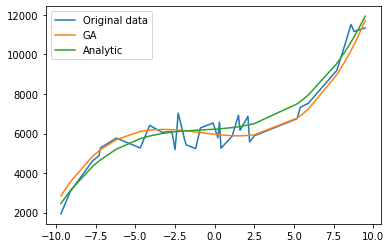

In [9]:
plot_all(new_population[best_match_idx, :])